<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Clustering_KMeans_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# supresses future warnings
import warnings
warnings.simplefilter(action='ignore')

#import pandas library for df creation
import pandas as pd

#import the numpy library to use random package
import numpy as np
import math

#import the matplotlib library for plotting
import matplotlib.pyplot as plt

#set plt style
plt.style.use('seaborn-whitegrid')

#use the magic function to ensure plots render in a notebook
%matplotlib inline

#Import the seaborn library for plotting
import seaborn as sns

#for data scaling
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#for pca
from sklearn.decomposition import PCA

#importing necessary libraries for ward linkage and clustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df=pd.read_csv("/content/drive/MyDrive/PhD research/VIX daily.csv")

In [70]:
df

,Date,Last Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,20/04/2022,21.19,NaN,NaN,NaN,NaN,NaN,NaN
1,19/04/2022,21.37,NaN,NaN,NaN,NaN,NaN,NaN
2,18/04/2022,22.17,NaN,NaN,NaN,NaN,NaN,NaN
3,14/04/2022,22.70,NaN,NaN,NaN,NaN,NaN,NaN
4,13/04/2022,21.82,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.isnull().any()

Date          True
Last Price    True
Unnamed: 2    True
Unnamed: 3    True
Unnamed: 4    True
Unnamed: 5    True
Unnamed: 6    True
Unnamed: 7    True
dtype: bool

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12247 entries, 0 to 12246
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8136 non-null   object 
 1   Last Price  8136 non-null   float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(7), object(1)
memory usage: 765.6+ KB


In [73]:
len(df)

12247

In [78]:
VIX_daily = df[["Date", "Last Price"]]

In [79]:
VIX_daily=VIX_daily.dropna()

In [80]:
VIX_daily

,Date,Last Price
0,20/04/2022,21.19
1,19/04/2022,21.37
2,18/04/2022,22.17
3,14/04/2022,22.70
4,13/04/2022,21.82
...,...,...
8131,08/01/1990,20.26
8132,05/01/1990,20.11
8133,04/01/1990,19.22
8134,03/01/1990,18.19


In [81]:
VIX_daily.isnull().any()

Date          False
Last Price    False
dtype: bool

In [82]:
VIX_daily=VIX_daily.dropna()

In [83]:
VIX_daily

,Date,Last Price
0,20/04/2022,21.19
1,19/04/2022,21.37
2,18/04/2022,22.17
3,14/04/2022,22.70
4,13/04/2022,21.82
...,...,...
8131,08/01/1990,20.26
8132,05/01/1990,20.11
8133,04/01/1990,19.22
8134,03/01/1990,18.19


In [91]:
VIX_daily['Date'] = (VIX_daily['Date'].apply(lambda x: float(x[0].replace(',', ''))))

In [92]:
# importing Library
from sklearn.cluster import KMeans

#getting labels
kmean = KMeans()
kmean.fit(VIX_daily)
labels=kmean.labels_

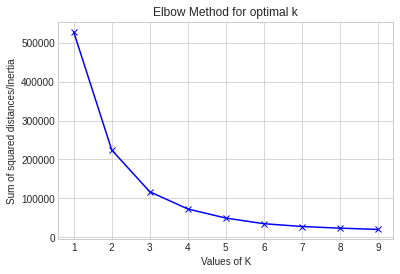

In [94]:
#elbow method
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(VIX_daily)
  Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method for optimal k')
plt.show()

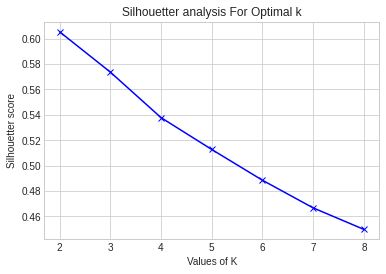

In [95]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

  #initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(VIX_daily)
  cluster_labels = kmeans.labels_

  # silhouette score

  silhouette_avg.append(silhouette_score(VIX_daily, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouetter score')
plt.title('Silhouetter analysis For Optimal k')
plt.show()  

In [97]:
# number of clusters 5
# PCA data with 5 clusters
clusterer = KMeans(n_clusters=5, random_state=42).fit(VIX_daily)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(VIX_daily)
print(centers)

[[ 1.1509434  13.3830479 ]
 [ 1.10679612 37.94257282]
 [ 1.14332248 26.51532899]
 [ 1.09550562 19.41616479]
 [ 1.12162162 62.00675676]]


In [98]:
ps1 = pd.DataFrame(VIX_daily)
ps1.head()

,Date,Last Price
0,2.0,21.19
1,1.0,21.37
2,1.0,22.17
3,1.0,22.70
4,1.0,21.82


['green', 'green', 'green', 'green', 'green', 'purple', 'purple', 'green', 'green', 'green']


ValueError: ignored

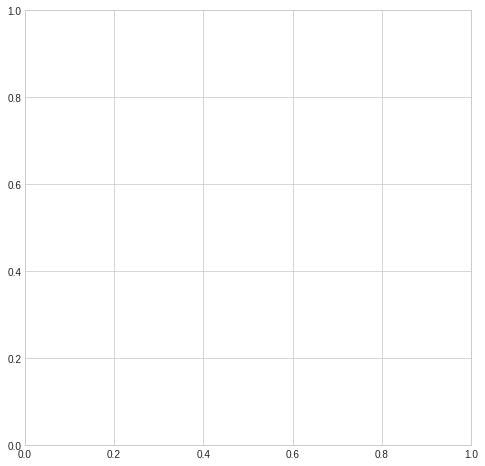

In [102]:
# plotting the K Mean Cluster
tocluster = pd.DataFrame(ps1)
fig = plt.figure(figsize=(8,8))
colors = ['orange', 'blue', 'purple', 'green', 'yellow']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster, tocluster, color=colored)
for ci, c in enumerate(centers):
  plt.plot(c, c, 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

  plt.xlabel('x_values')
  plt.ylabel('y_values')
  plt.legend()
  plt.show()